# === IMPORTING LIBRARIES ===

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# === Load and Preview Data ===

In [6]:
df = pd.read_csv('Titanic-Dataset.csv')

In [7]:
# Preview the first few rows
print("\n=== Dataset Preview ===")
print(df.head())


=== Dataset Preview ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [8]:
# Basic information about the dataset
print("\n=== Dataset Info ===")
print(df.info())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# === Data Preprocessing ===

In [9]:
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Handle missing values
# 1. Filling missing 'Age' with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
# 2. Filling missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
# 3. Droping 'Cabin' due to high missing values
df.drop('Cabin', axis=1, inplace=True)

In [13]:
# 4. Creating a new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [14]:
# 5. Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                  'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [15]:
# Previewing the processed data
print("\n=== Processed Data Preview ===")
print(df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'FamilySize', 'Title']].head())


=== Processed Data Preview ===
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

   FamilySize Title  
0           2    Mr  
1           2   Mrs  
2           1  Miss  
3           2   Mrs  
4           1    Mr  


# === Exploratory Data Analysis (EDA) ===

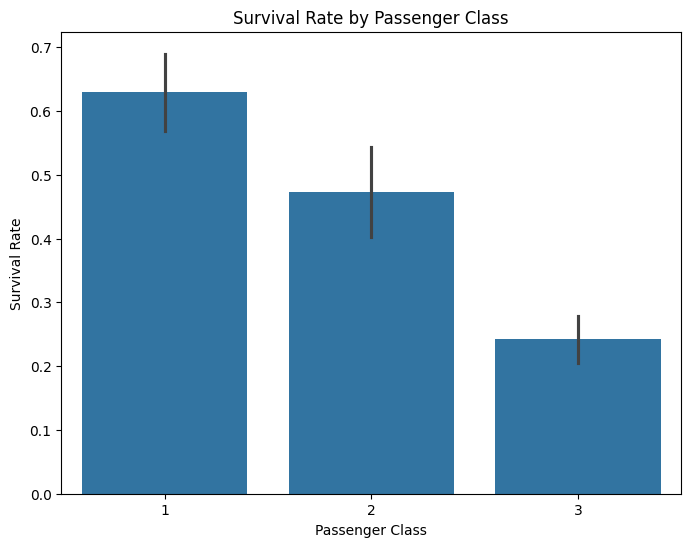

In [16]:
# Survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()


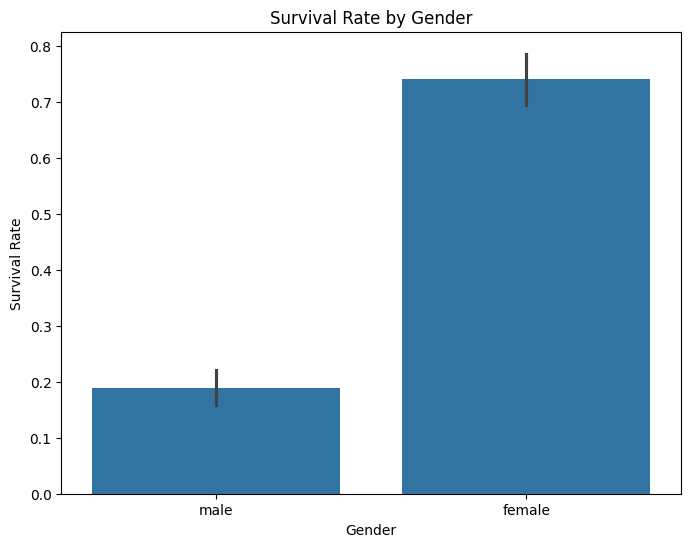

In [17]:
# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

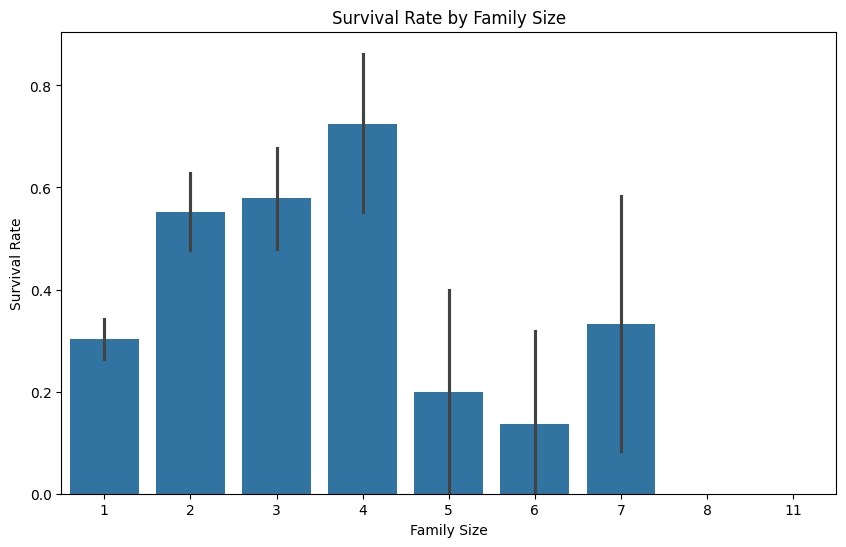

In [18]:
# Survival rate by family size
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()


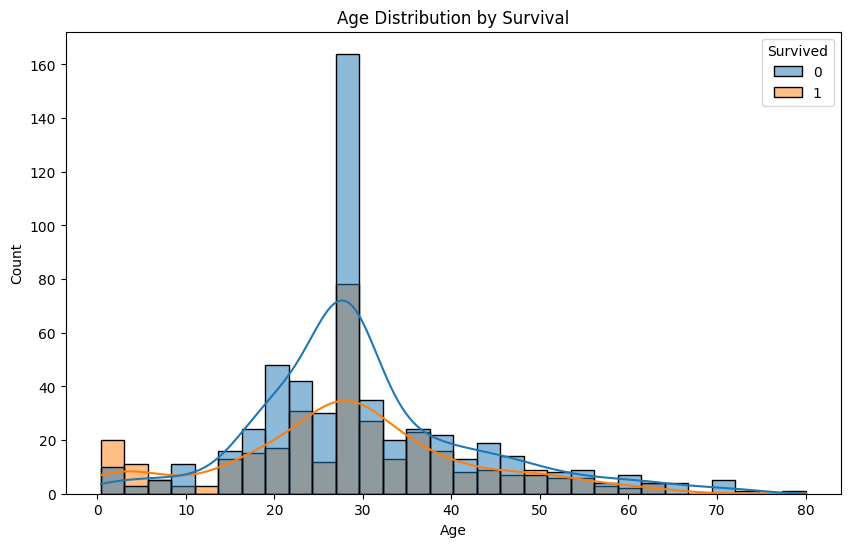

In [19]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# === Feature Engineering ===

In [20]:
# Converting categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

In [21]:
# Creating age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, 80], labels=[0, 1, 2, 3, 4])

In [27]:
# Debug: Print columns before dropping
print("\n=== DataFrame Columns Before Dropping ===")
print(df.columns)


=== DataFrame Columns Before Dropping ===
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'Title', 'AgeGroup'],
      dtype='object')


In [28]:
# Drop unnecessary columns only if they exist
columns_to_drop = ['Name', 'Ticket', 'PassengerId']
columns_present = [col for col in columns_to_drop if col in df.columns]
if columns_present:
    df.drop(columns_present, axis=1, inplace=True)
    print(f"Dropped columns: {columns_present}")
else:
    print("No columns to drop; they may already be removed.")

No columns to drop; they may already be removed.


In [29]:
# Preview final features
print("\n=== Final Features Preview ===")
print(df.head())


=== Final Features Preview ===
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         0       3    0  22.0      1      0   7.2500         0           2   
1         1       1    1  38.0      1      0  71.2833         1           2   
2         1       3    1  26.0      0      0   7.9250         0           1   
3         1       1    1  35.0      1      0  53.1000         0           2   
4         0       3    0  35.0      0      0   8.0500         0           1   

   Title AgeGroup  
0      0        2  
1      2        3  
2      1        2  
3      2        3  
4      0        3  


# === Model Preparation ===

In [30]:
# Defining features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [31]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_train[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X_train[['Age', 'Fare', 'FamilySize']])
X_test[['Age', 'Fare', 'FamilySize']] = scaler.transform(X_test[['Age', 'Fare', 'FamilySize']])

# === Model Training ===

In [32]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# === Model Evaluation ===

In [33]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [34]:
# Print evaluation metrics
print("\n=== Model Evaluation ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Model Evaluation ===
Accuracy Score: 0.8212290502793296

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



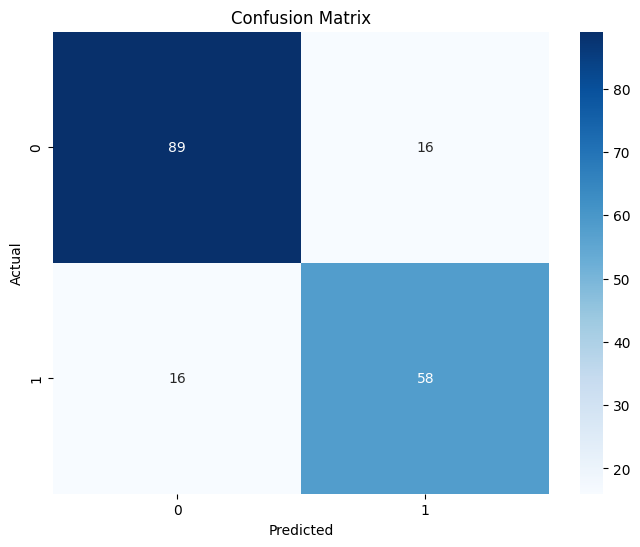

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


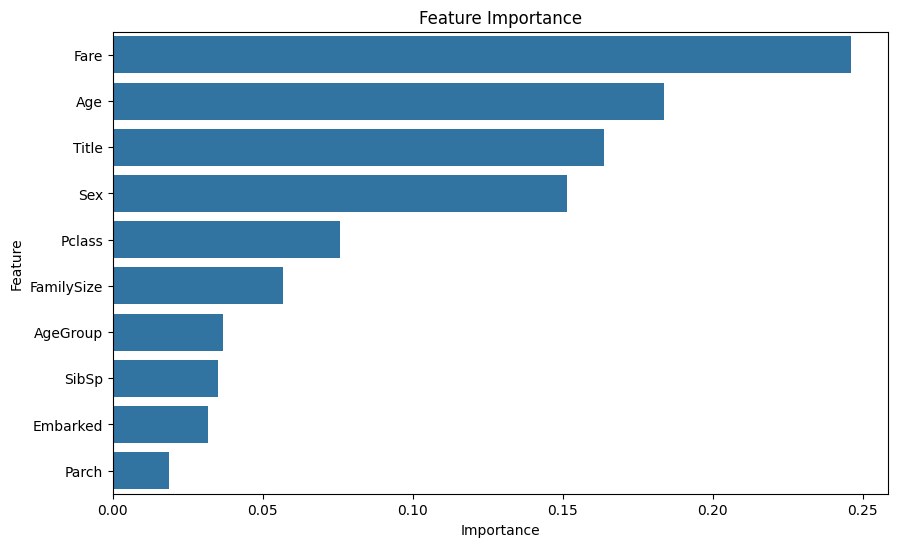

In [36]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# === Additional Insights ===

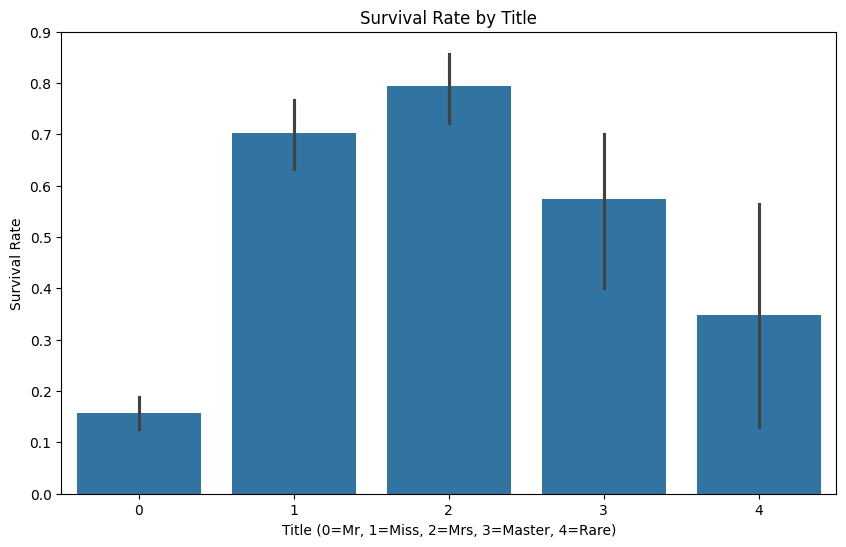

In [37]:
# Survival probability by title
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.xlabel('Title (0=Mr, 1=Miss, 2=Mrs, 3=Master, 4=Rare)')
plt.ylabel('Survival Rate')
plt.show()


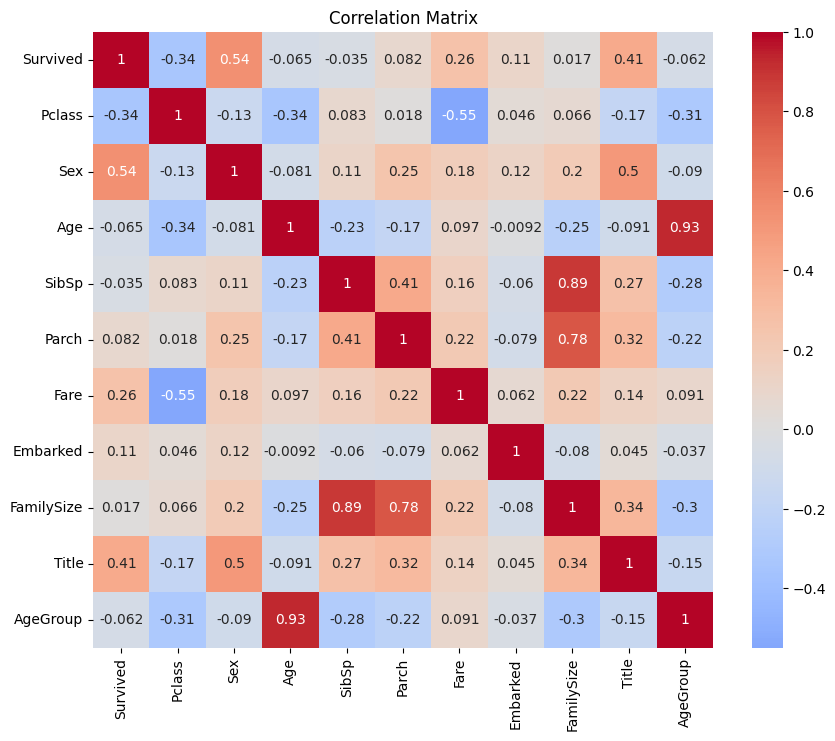

In [38]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()